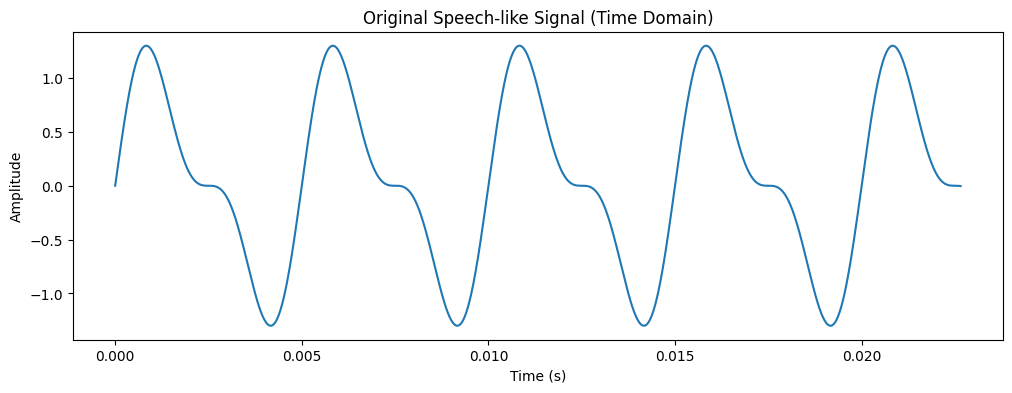

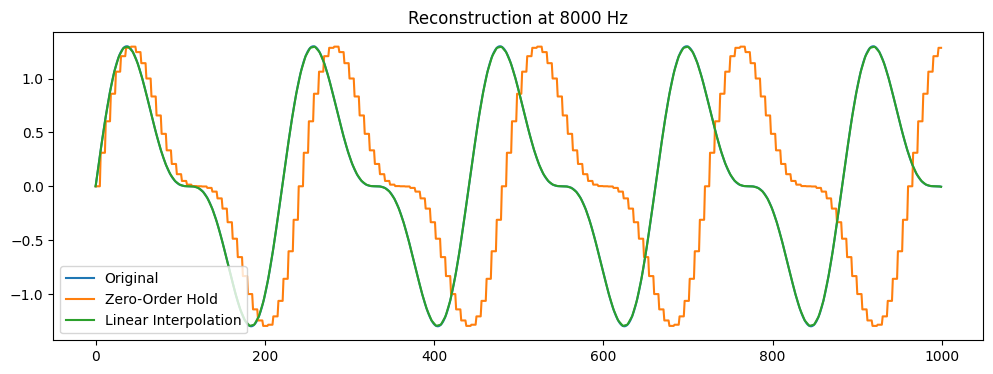

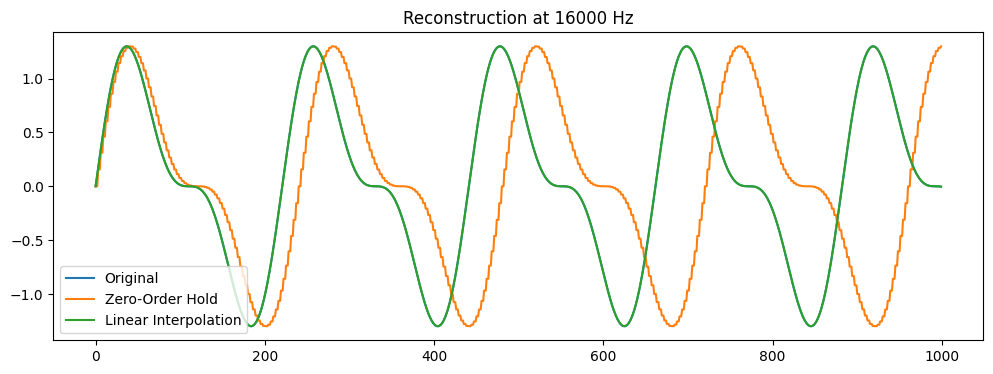

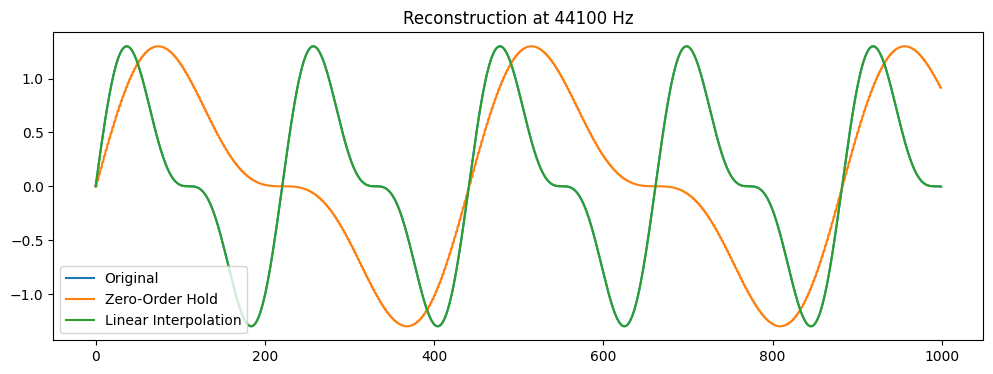

MSE Results (Original vs Reconstructed):
8000 Hz -> ZOH MSE: 1.239624, Linear MSE: 0.000016
16000 Hz -> ZOH MSE: 1.239061, Linear MSE: 0.000001
44100 Hz -> ZOH MSE: 0.750101, Linear MSE: 0.000000


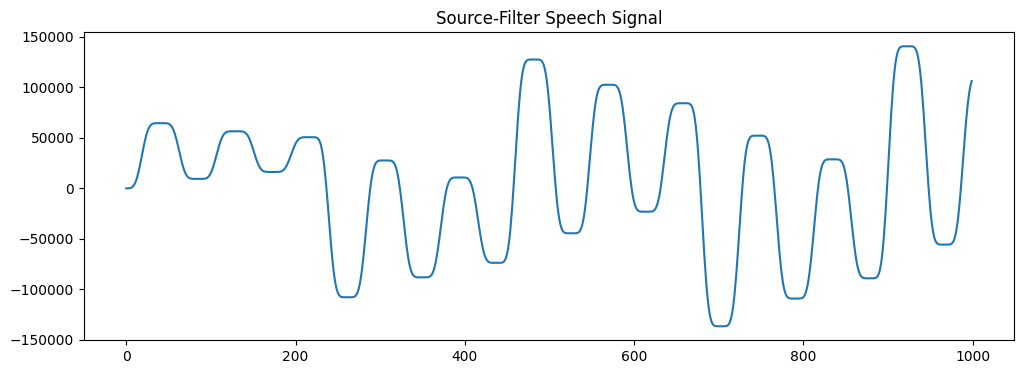

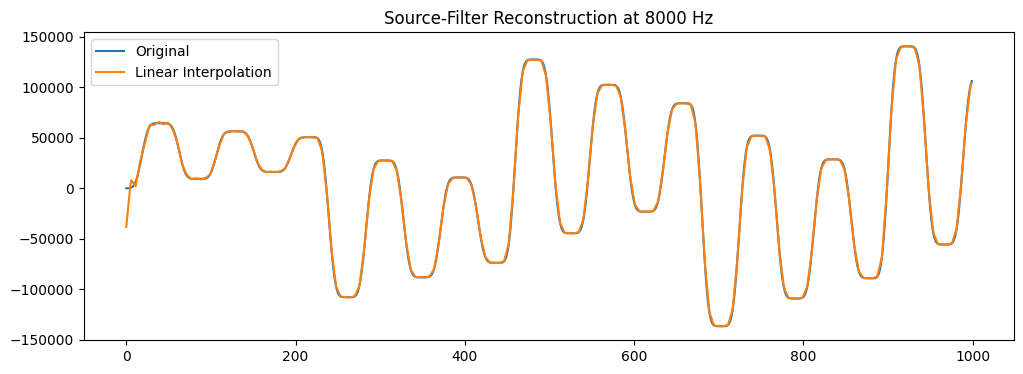

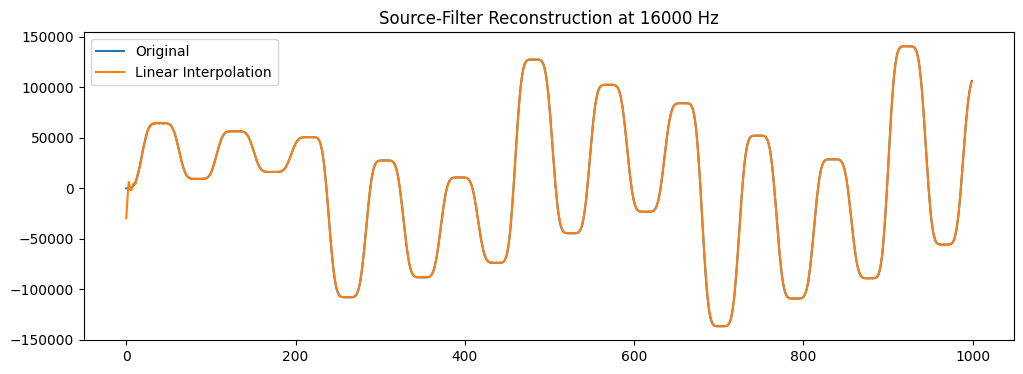

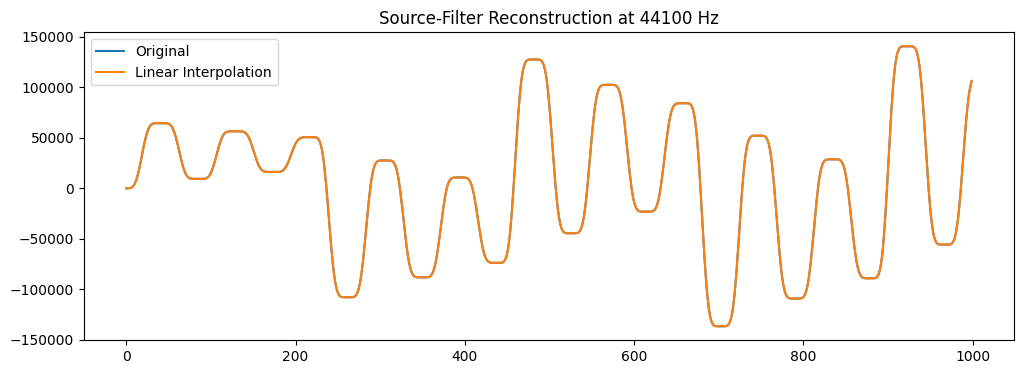

Source-Filter Model MSE Results:
8000 Hz -> Linear MSE: 3856359.763530
16000 Hz -> Linear MSE: 277584.273139
44100 Hz -> Linear MSE: 0.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from sklearn.metrics import mean_squared_error

# -------------------------
# Utility functions
# -------------------------
def downsample(signal_in, orig_sr, target_sr):
    """Resample signal from orig_sr to target_sr."""
    num_samples = int(len(signal_in) * target_sr / orig_sr)
    return signal.resample(signal_in, num_samples)

def reconstruct_zero_order(sampled, orig_len):
    """Zero-order hold reconstruction."""
    # Ensure the reconstructed signal has the exact original length
    interp = np.repeat(sampled, orig_len // len(sampled) + 1)[:orig_len]
    return interp[:orig_len]

def reconstruct_linear(sampled, orig_len):
    """Linear interpolation reconstruction."""
    x = np.linspace(0, orig_len, num=len(sampled), endpoint=False)
    x_new = np.arange(orig_len)
    return np.interp(x_new, x, sampled)

# -------------------------
# Part 1: Sampling & Reconstruction
# -------------------------

# Generate synthetic speech-like signal (if no .wav is provided)
fs = 44100  # original sampling rate
t = np.linspace(0, 1, fs, endpoint=False)
orig_signal = np.sin(2*np.pi*200*t) + 0.5*np.sin(2*np.pi*400*t)

plt.figure(figsize=(12,4))
plt.plot(t[:1000], orig_signal[:1000])
plt.title("Original Speech-like Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Sampling rates to test
sampling_rates = [8000, 16000, 44100]

results = {}
for sr in sampling_rates:
    sampled = downsample(orig_signal, fs, sr)
    reconstructed_zo = reconstruct_zero_order(sampled, len(orig_signal))
    reconstructed_lin = reconstruct_linear(sampled, len(orig_signal))

    mse_zo = mean_squared_error(orig_signal, reconstructed_zo)
    mse_lin = mean_squared_error(orig_signal, reconstructed_lin)
    results[sr] = (mse_zo, mse_lin)

    plt.figure(figsize=(12,4))
    plt.plot(orig_signal[:1000], label="Original")
    plt.plot(reconstructed_zo[:1000], label="Zero-Order Hold")
    plt.plot(reconstructed_lin[:1000], label="Linear Interpolation")
    plt.title(f"Reconstruction at {sr} Hz")
    plt.legend()
    plt.show()

print("MSE Results (Original vs Reconstructed):")
for sr, (mse_zo, mse_lin) in results.items():
    print(f"{sr} Hz -> ZOH MSE: {mse_zo:.6f}, Linear MSE: {mse_lin:.6f}")

# -------------------------
# Part 2: Source-Filter Model
# -------------------------

def source_filter_model(fs, duration=1.0, f0=100):
    """Generate synthetic voiced speech signal."""
    t = np.linspace(0, duration, int(fs*duration), endpoint=False)
    # Source: glottal pulse train
    source = signal.square(2*np.pi*f0*t)
    # Filter: simple vocal tract (all-pole approximation)
    formants = [500, 1500, 2500]  # resonant freqs
    b = [1.0]
    a = [1.0]
    for f in formants:
        r = np.exp(-np.pi*50/fs)  # bandwidth ~50 Hz
        a = np.convolve(a, [1, -2*r*np.cos(2*np.pi*f/fs), r**2])
    filtered = signal.lfilter(b, a, source)
    return filtered

orig_sf = source_filter_model(fs)

plt.figure(figsize=(12,4))
plt.plot(orig_sf[:1000])
plt.title("Source-Filter Speech Signal")
plt.show()

# Sampling + Reconstruction for source-filter
results_sf = {}
for sr in sampling_rates:
    sampled = downsample(orig_sf, fs, sr)
    reconstructed_lin = reconstruct_linear(sampled, len(orig_sf))
    mse_lin = mean_squared_error(orig_sf, reconstructed_lin)
    results_sf[sr] = mse_lin

    plt.figure(figsize=(12,4))
    plt.plot(orig_sf[:1000], label="Original")
    plt.plot(reconstructed_lin[:1000], label="Linear Interpolation")
    plt.title(f"Source-Filter Reconstruction at {sr} Hz")
    plt.legend()
    plt.show()

print("Source-Filter Model MSE Results:")
for sr, mse_lin in results_sf.items():
    print(f"{sr} Hz -> Linear MSE: {mse_lin:.6f}")

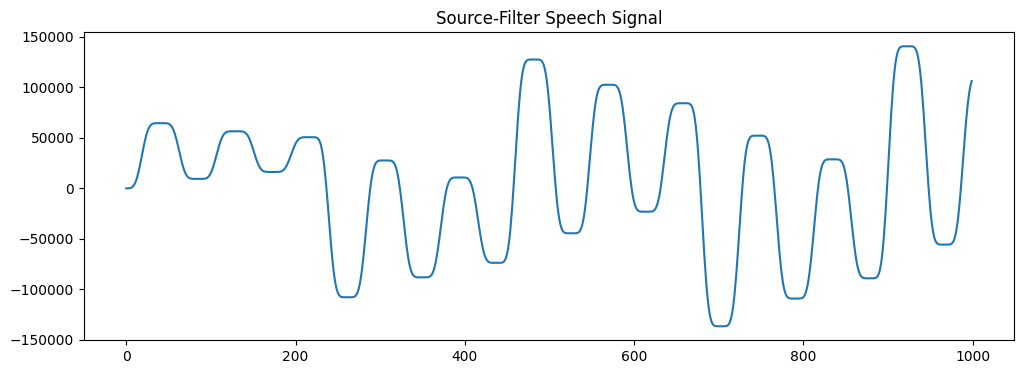

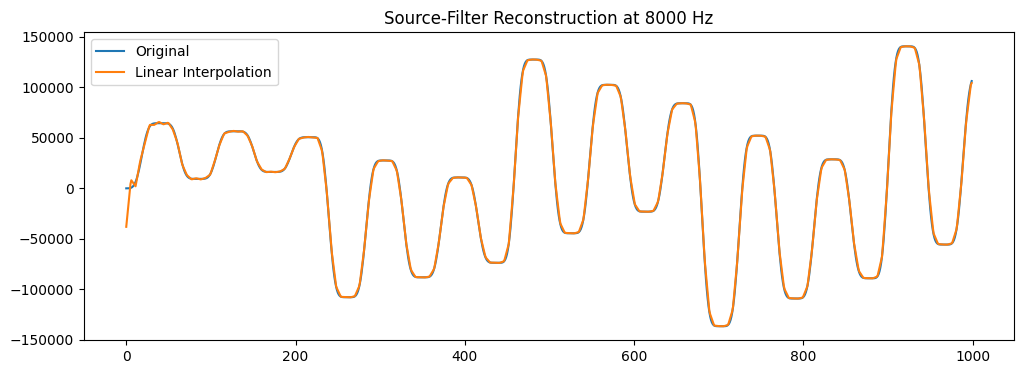

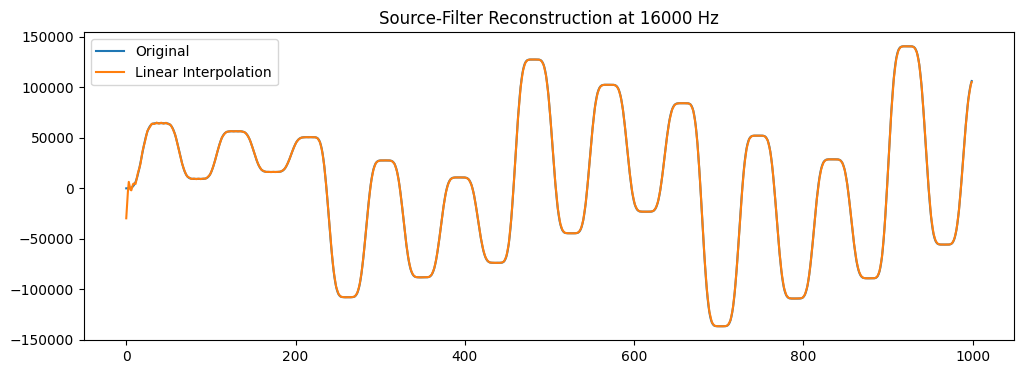

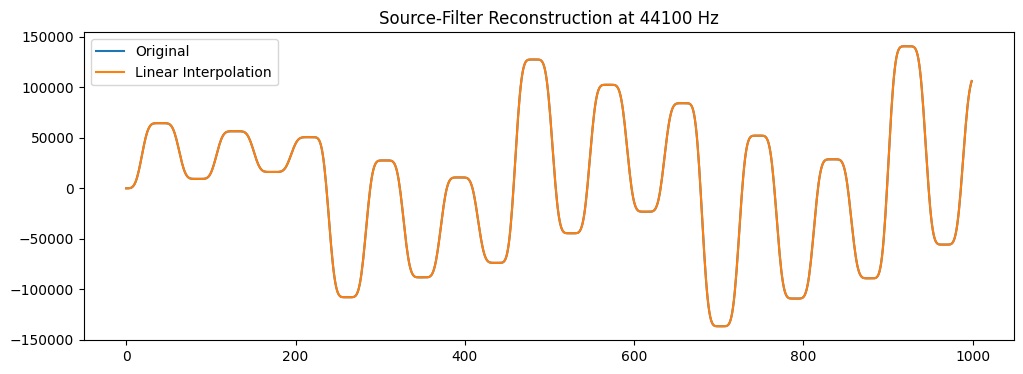

Source-Filter Model MSE Results:
8000 Hz -> Linear MSE: 353450567.582489
16000 Hz -> Linear MSE: 91326103.820734
44100 Hz -> Linear MSE: 12142631.957770


In [6]:
def downsample(signal_in, orig_sr, target_sr):
    """Resample signal from orig_sr to target_sr."""
    num_samples = int(len(signal_in) * target_sr / orig_sr)
    return signal.resample(signal_in, num_samples)


def reconstruct_zero_order(sampled, orig_len):
    """Zero-order hold reconstruction."""
    interp = np.repeat(sampled, orig_len // len(sampled))
    return interp[:orig_len]


def reconstruct_linear(sampled, orig_len):
    """Linear interpolation reconstruction."""
    x = np.linspace(0, orig_len, num=len(sampled))
    x_new = np.arange(orig_len)
    return np.interp(x_new, x, sampled)
use_real_audio = True


def source_filter_model(fs, duration=1.0, f0=100):
    t = np.linspace(0, duration, int(fs*duration), endpoint=False)
    # Source: glottal pulse train
    source = signal.square(2*np.pi*f0*t)
    # Filter: simple vocal tract (all-pole approximation)
    formants = [500, 1500, 2500] # resonant freqs
    b = [1.0]
    a = [1.0]
    for f in formants:
        r = np.exp(-np.pi*50/fs) # bandwidth ~50 Hz
        a = np.convolve(a, [1, -2*r*np.cos(2*np.pi*f/fs), r**2])
    filtered = signal.lfilter(b, a, source)
    return filtered


orig_sf = source_filter_model(fs)


plt.figure(figsize=(12,4))
plt.plot(orig_sf[:1000])
plt.title("Source-Filter Speech Signal")
plt.show()


# Sampling + Reconstruction for source-filter
results_sf = {}
for sr in sampling_rates:
    sampled = downsample(orig_sf, fs, sr)
    reconstructed_lin = reconstruct_linear(sampled, len(orig_sf))
    mse_lin = mean_squared_error(orig_sf, reconstructed_lin)
    results_sf[sr] = mse_lin


    plt.figure(figsize=(12,4))
    plt.plot(orig_sf[:1000], label="Original")
    plt.plot(reconstructed_lin[:1000], label="Linear Interpolation")
    plt.title(f"Source-Filter Reconstruction at {sr} Hz")
    plt.legend()
    plt.show()


print("Source-Filter Model MSE Results:")
for sr, mse_lin in results_sf.items():
    print(f"{sr} Hz -> Linear MSE: {mse_lin:.6f}")